<a href="https://colab.research.google.com/github/Mainabryan/loan-approval-prediction-logistic-regressio/blob/main/Loan_Approval_predictor(logistic_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the neccesary libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



## Load the datset

In [12]:
data = pd.read_csv('/content/loan_data.csv')

## EDA (EXPALTORY DATA ANALYSIS)

In [13]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LN0001,Male,Yes,1,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,1.0
1,LN0002,Female,No,0,Graduate,Yes,4583,0.0,128.0,360.0,1.0,Semiurban,1.0
2,LN0003,Male,Yes,3+,Graduate,No,6000,2250.0,265.0,360.0,1.0,Rural,1.0
3,LN0004,Male,No,0,Not Graduate,No,2583,2358.0,120.0,360.0,0.0,Urban,0.0
4,LN0005,Female,Yes,2,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Semiurban,1.0


In [14]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
496,LN0496,Male,Yes,2,Not Graduate,No,3333,0.0,120.0,360.0,0.0,Semiurban,0.0
497,LN0497,Female,No,0,Graduate,Yes,2500,0.0,100.0,360.0,1.0,Urban,1.0
498,LN0498,Male,Yes,1,Graduate,No,6250,0.0,210.0,360.0,1.0,Rural,1.0
499,LN0499,Female,Yes,0,Not Graduate,No,2083,0.0,80.0,360.0,0.0,Semiurban,0.0
500,LN0500,Male,No,0,Graduate,No,7667,0.0,200.0,360.0,1.0,Urban,1.0


This is the first step where you bring your .csv file into your working environment

## EDA (EXPALTORY DATA ANALYSIS)

# MIssing values

In [15]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,2
LoanAmount,2
Loan_Amount_Term,2


In [16]:
# Fill numerical columns with median
data['CoapplicantIncome'] = data['CoapplicantIncome'].fillna(data['CoapplicantIncome'].median())
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())

# Fill categorical / discrete numeric columns with mode
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])
data['Property_Area'] = data['Property_Area'].fillna(data['Property_Area'].mode()[0])

# Drop the unworthy columns

In [17]:
data.dropna(subset=['Loan_Status'], inplace=True)

# Confirming the missing values

In [18]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


# Detetect outliers

In [29]:
print("Gender:", data['Gender'].unique())
print("Married:", data['Married'].unique())
print("Dependents:", data['Dependents'].unique())
print("Education:", data['Education'].unique())
print("Self_Employed:", data['Self_Employed'].unique())
print("Property_Area:", data['Property_Area'].unique())
print("Loan_Status:", data['Loan_Status'].unique())  # already numeric but you can check


Gender: [1 0]
Married: [1 0]
Dependents: ['1' '0' '3+' '2']
Education: [1 0]
Self_Employed: [0 1]
Property_Area: ['Urban' 'Semiurban' 'Rural']
Loan_Status: [1. 0.]


#Check the columns individual characters

 Visualize the outliers Applicant income

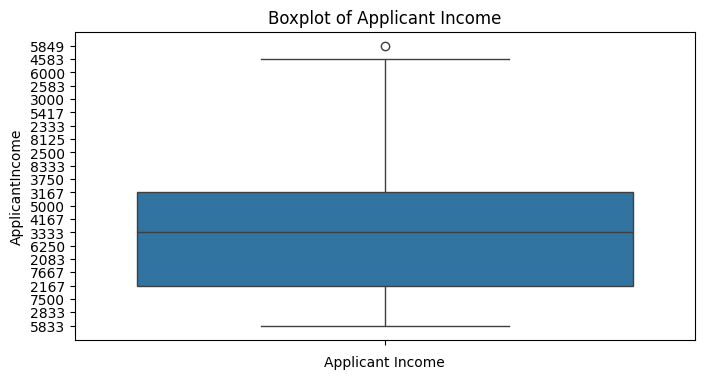

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
sns.boxplot(data['ApplicantIncome'])
plt.title('Boxplot of Applicant Income')
plt.xlabel('Applicant Income')
plt.show()

# The one dot above show  that one individual earns more money than the others

## 2. Boxplot for CoapplicantIncome

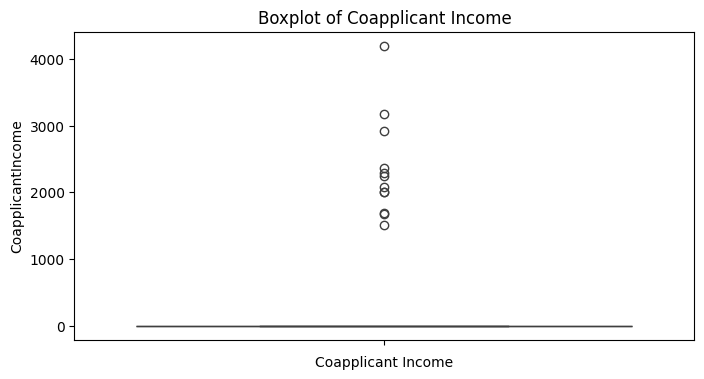

In [20]:
plt.figure(figsize=(8, 4))
sns.boxplot(data['CoapplicantIncome'])
plt.title('Boxplot of Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.show()


#Coapplicant income is usually low or nonexistent, which tells us most loan applications are carried by the main applicant. However, a few applicants have strong financial backing from coapplicants, which might increase their approval chances.

#Boxplot for loan amount

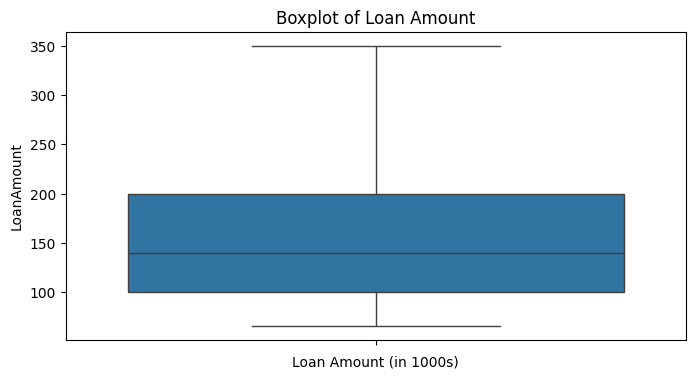

In [21]:
plt.figure(figsize=(8, 4))
sns.boxplot(data['LoanAmount'])
plt.title('Boxplot of Loan Amount')
plt.xlabel('Loan Amount (in 1000s)')
plt.show()

## The LoanAmount variable showed a well-distributed range with no significant outliers. The majority of applicants requested typical loan amounts, indicating consistent data generation. No special treatment was applied here.

## Data Preparation for Modeling

# Encode the categorrical values

# Label encoding
we use it to those that have two answer like (yes/no)

In [22]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Married'] = data['Married'].map({'Yes': 1, 'No': 0})
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].map({'Yes': 1, 'No': 0})


# One-hot encoding


In [31]:
data['Dependents'] = data['Dependents'].replace('3+', 3).astype(int)



In [32]:
data = pd.get_dummies(data, columns=['Property_Area'], drop_first=True)


# Spliting the data features into X and Y columns

# the tartget is loan status
This is the main goal of the entire project — to help a bank or loan officer decide:

    "Should we approve or reject this loan application?"

In [33]:
#ill drop the columns loan ID and loan status first
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = data['Loan_Status']

# Spliting the train into training and testing tests

In [34]:
from sklearn.model_selection import train_test_split

# 70% for training, 30% for testing (you can do 80/20 too)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


Term	Meaning
X_train	Data your model learns from

X_test	Data your model is tested on

y_train	Actual labels for training data

y_test	Actual labels for test data

##   Train the Logistic Regression Model

In [35]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model using training data
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

X_train, y_train → will be used to train (teach) the model

X_test, y_test → will be used to evaluate how good the  model is

# Make Predictions

In [36]:
# Predict loan status on test data
y_pred = model.predict(X_test)


## Evaluate the model performances

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[ 48   0]
 [  0 102]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00       102

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



## Actual vs Predicted Barplot

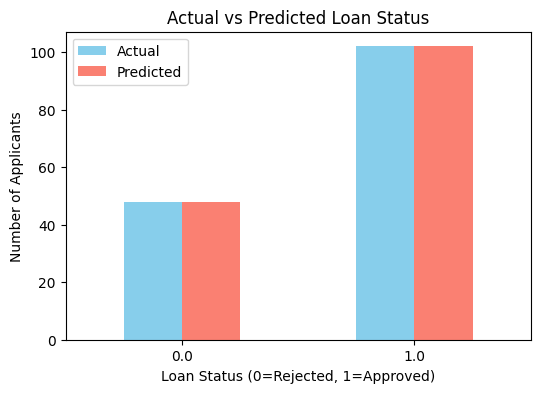

In [38]:
import pandas as pd

# Count values
actual_counts = pd.Series(y_test).value_counts().sort_index()
predicted_counts = pd.Series(y_pred).value_counts().sort_index()

df_compare = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted': predicted_counts
})

df_compare.plot(kind='bar', figsize=(6,4), color=['skyblue', 'salmon'])
plt.title('Actual vs Predicted Loan Status')
plt.xlabel('Loan Status (0=Rejected, 1=Approved)')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.show()


## Confusion Matrix (Heatmap)

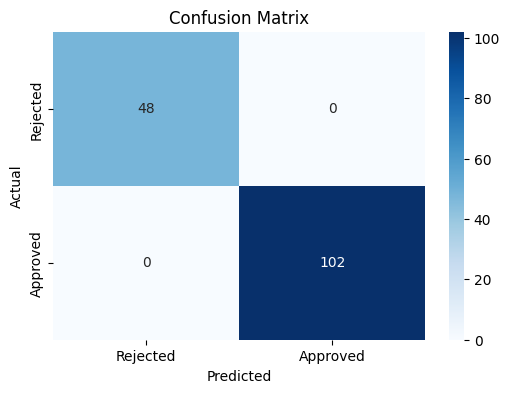

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


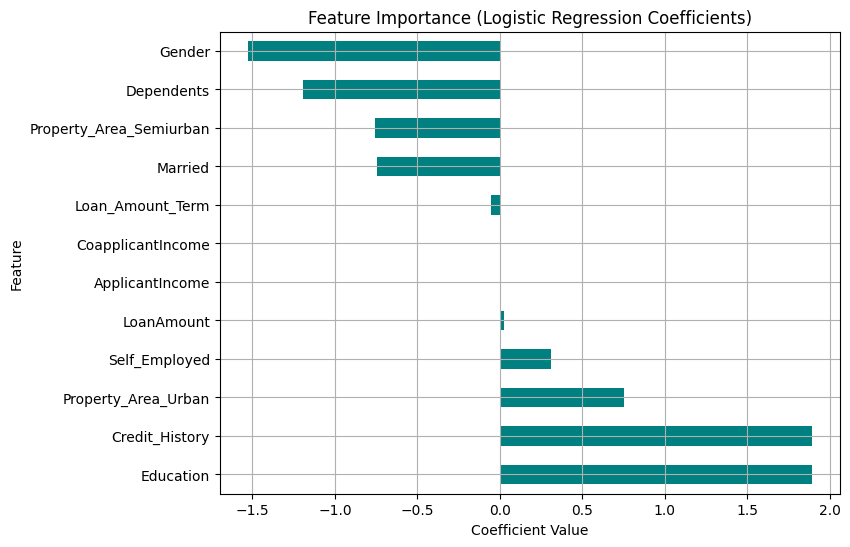

In [40]:
import numpy as np
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

feature_importance.plot(kind='barh', figsize=(8,6), color='teal')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.show()


In [41]:
import joblib

# Save the model
joblib.dump(model, 'loan_model.pkl')


['loan_model.pkl']